In [1]:
import pandas as pd

# Load the CSV file containing labels
df = pd.read_csv('label.csv')
allClasses=df['label'].unique()
imagesPerClass = df['label'].value_counts()

In [3]:
allClasses

array(['sitting', 'using_laptop', 'hugging', 'sleeping', 'drinking',
       'clapping', 'dancing', 'cycling', 'calling', 'laughing', 'eating',
       'fighting', 'listening_to_music', 'running', 'texting'],
      dtype=object)

In [4]:
imagesPerClass

label
sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: count, dtype: int64

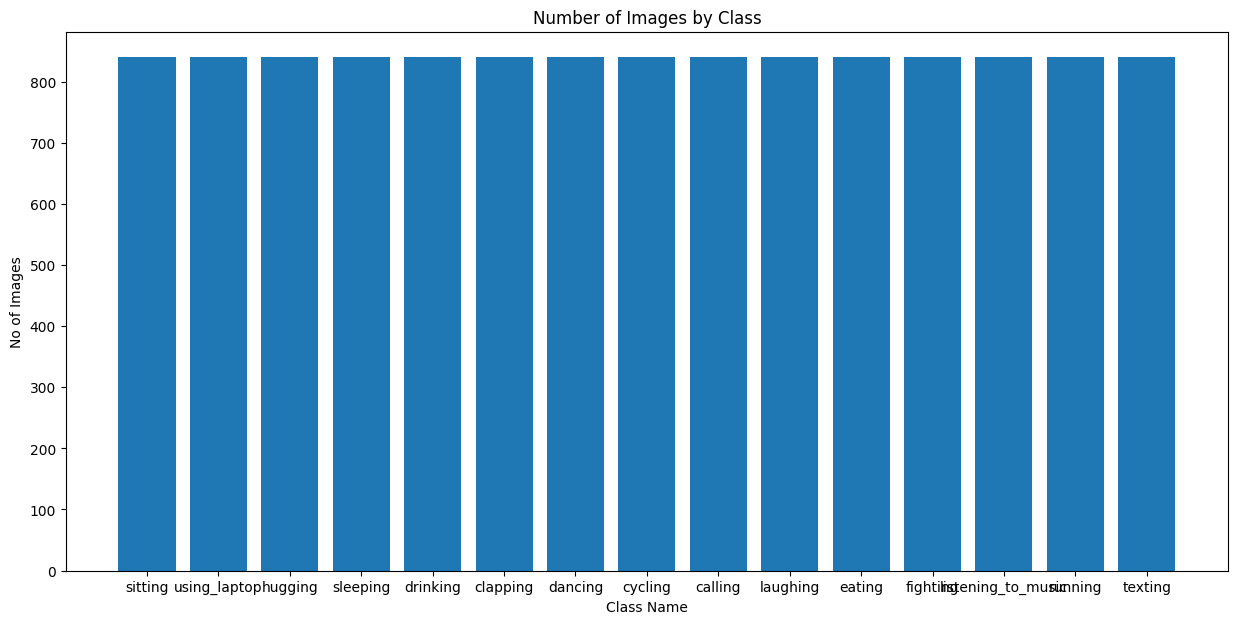

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.bar(allClasses, imagesPerClass);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('No of Images');

In [8]:
import os
imageHeightList = []
imageWidthList = []
imageSizeList=[]

from PIL import Image 
# https://www.geeksforgeeks.org/how-to-find-width-and-height-of-an-image-using-python/
# https://medium.com/@sehjadkhoja0/title-exploring-and-analyzing-image-data-with-python-79a7f72f4d2b
for filename in df['filename']:
    with Image.open(os.path.join('data', filename)) as img:
        Csize = os.path.getsize(os.path.join('data', filename))
        imageSizeList.append(Csize)
        w,h=img.size
        imageHeightList.append(h)
        imageWidthList.append(w)
imageDetail = pd.DataFrame({
    'height': imageHeightList,
    'width': imageWidthList,
    'size': imageSizeList,
    'label':df['label']
})
# print(imageDetail)



In [9]:
imageDetail

height  width   size               label
0         160    240  23538             sitting
1         183    275  15256        using_laptop
2         183    275  13641             hugging
3         183    275  15917            sleeping
4         210    240  20191        using_laptop
...       ...    ...    ...                 ...
12595     183    275  23317             sitting
12596     189    266  21105            clapping
12597     190    266  21977             sitting
12598     264    191   7679             dancing
12599     192    263  10978  listening_to_music

[12600 rows x 4 columns]

In [15]:
label_stats = {}
for label in allClasses:
    label_stats[label] = {
        'height_sum': 0,
        'width_sum': 0,
        'size_sum': 0,
        'count': 0
    }
for _, row in imageDetail.iterrows():
    label = row['label']
    label_stats[label]['height_sum']+=row['height']
    label_stats[label]['width_sum']+=row['width']
    label_stats[label]['size_sum']+=row['size']
    label_stats[label]['count']+=1

for label, stats in label_stats.items():
    count = stats['count']
    mean_height=stats['height_sum']/count
    mean_width=stats['width_sum']/count
    mean_size=stats['size_sum']/count
    print(f"Label: {label}")
    print(f"  Mean Height: {mean_height:.2f}")
    print(f"  Mean Width: {mean_width:.2f}")
    print(f"  Mean Size: {mean_size:.2f}")
    print()

840
Label: sitting
  Mean Height: 195.97
  Mean Width: 259.62
  Mean Size: 20559.88

840
Label: using_laptop
  Mean Height: 201.20
  Mean Width: 253.73
  Mean Size: 16865.94

840
Label: hugging
  Mean Height: 204.19
  Mean Width: 252.83
  Mean Size: 17874.08

840
Label: sleeping
  Mean Height: 190.86
  Mean Width: 265.04
  Mean Size: 15766.40

840
Label: drinking
  Mean Height: 201.68
  Mean Width: 255.01
  Mean Size: 15805.10

840
Label: clapping
  Mean Height: 191.93
  Mean Width: 265.55
  Mean Size: 19651.40

840
Label: dancing
  Mean Height: 205.36
  Mean Width: 250.52
  Mean Size: 17162.05

840
Label: cycling
  Mean Height: 200.98
  Mean Width: 257.02
  Mean Size: 24993.97

840
Label: calling
  Mean Height: 205.10
  Mean Width: 252.11
  Mean Size: 16016.12

840
Label: laughing
  Mean Height: 202.21
  Mean Width: 255.17
  Mean Size: 14490.14

840
Label: eating
  Mean Height: 184.23
  Mean Width: 278.09
  Mean Size: 22727.53

840
Label: fighting
  Mean Height: 187.49
  Mean Width: 2

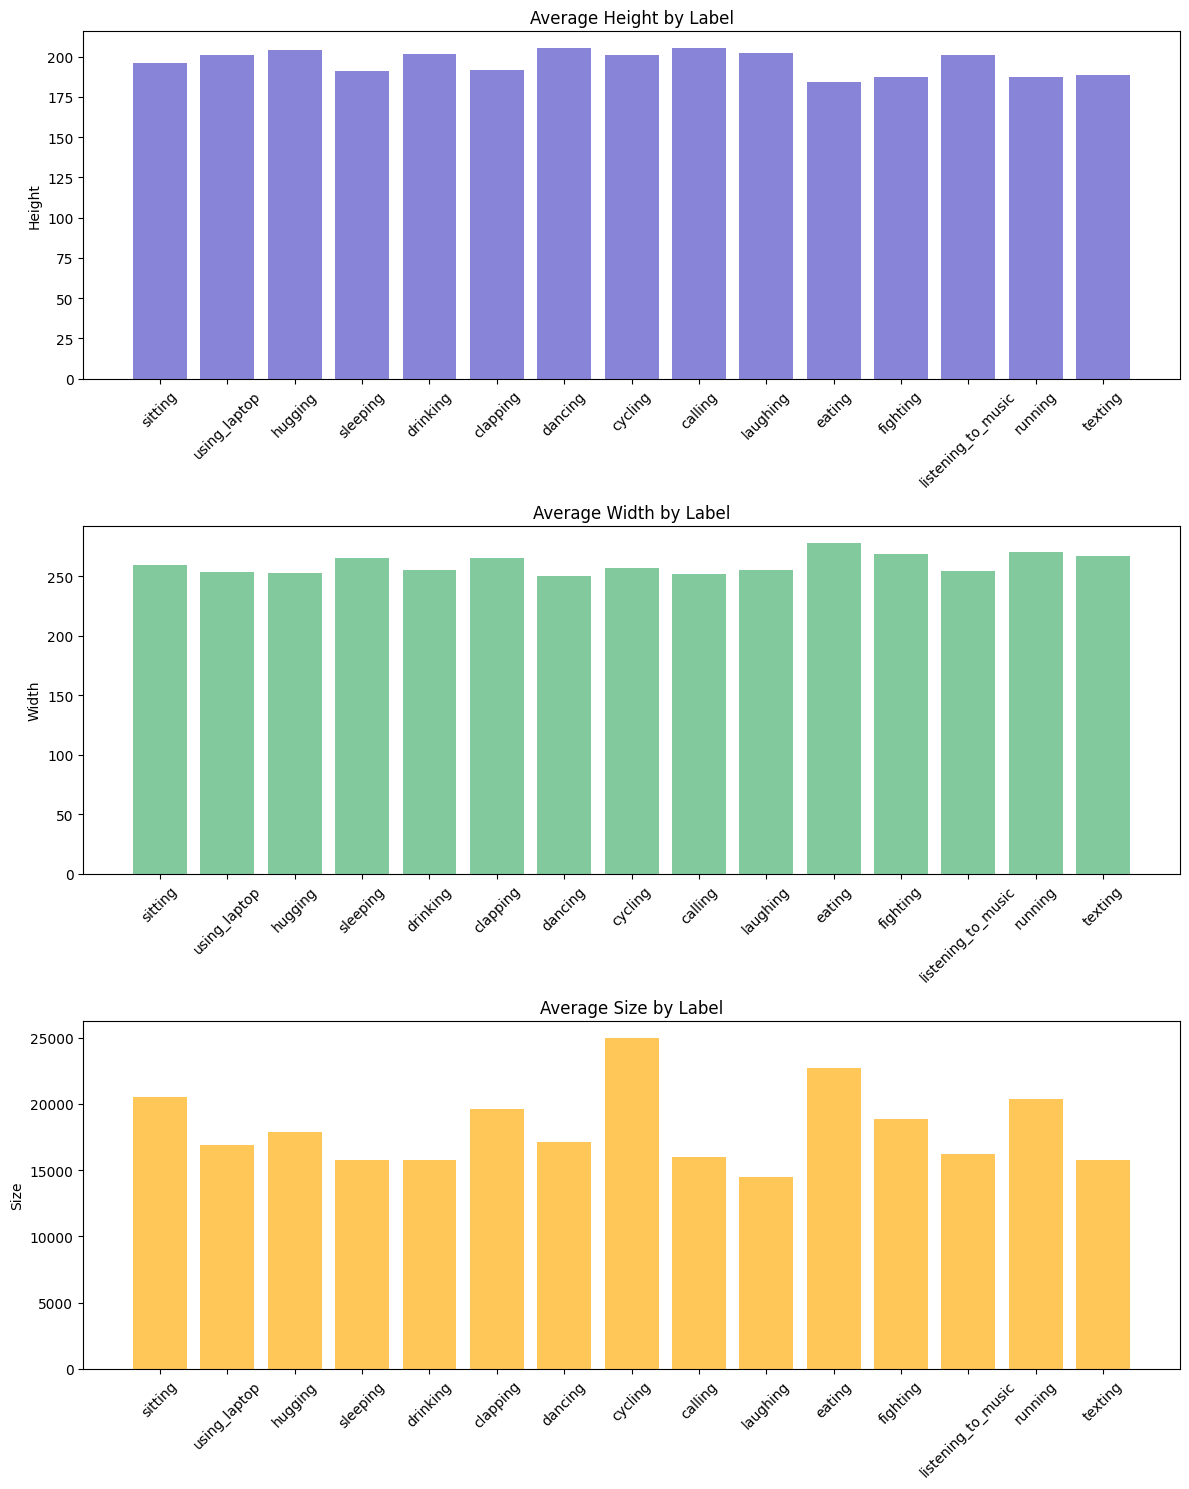

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
labels = list(label_stats.keys())
heights = [stats['height_sum'] / stats['count'] for stats in label_stats.values()]
widths = [stats['width_sum'] / stats['count'] for stats in label_stats.values()]
sizes = [stats['size_sum'] / stats['count'] for stats in label_stats.values()]
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))
x = np.arange(len(labels))
ax1.bar(x, heights, color='#8884d8')
ax1.set_title('Average Height by Label')
ax1.set_ylabel('Height')
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=45)
ax2.bar(x, widths, color='#82ca9d')
ax2.set_title('Average Width by Label')
ax2.set_ylabel('Width')
ax2.set_xticks(x)
ax2.set_xticklabels(labels, rotation=45)
ax3.bar(x, sizes, color='#ffc658')
ax3.set_title('Average Size by Label')
ax3.set_ylabel('Size')
ax3.set_xticks(x)
ax3.set_xticklabels(labels, rotation=45)
plt.tight_layout()
plt.show()

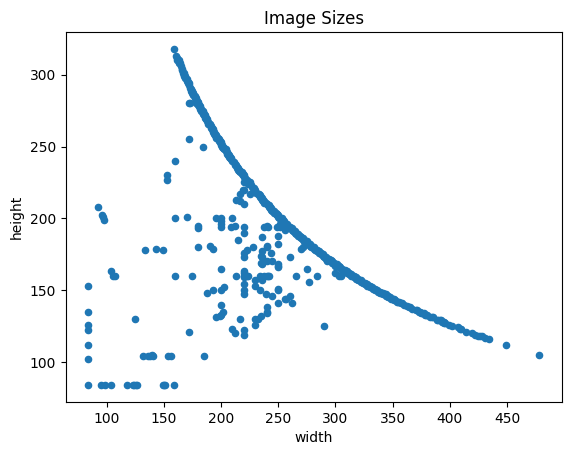

<Figure size 1200x600 with 0 Axes>

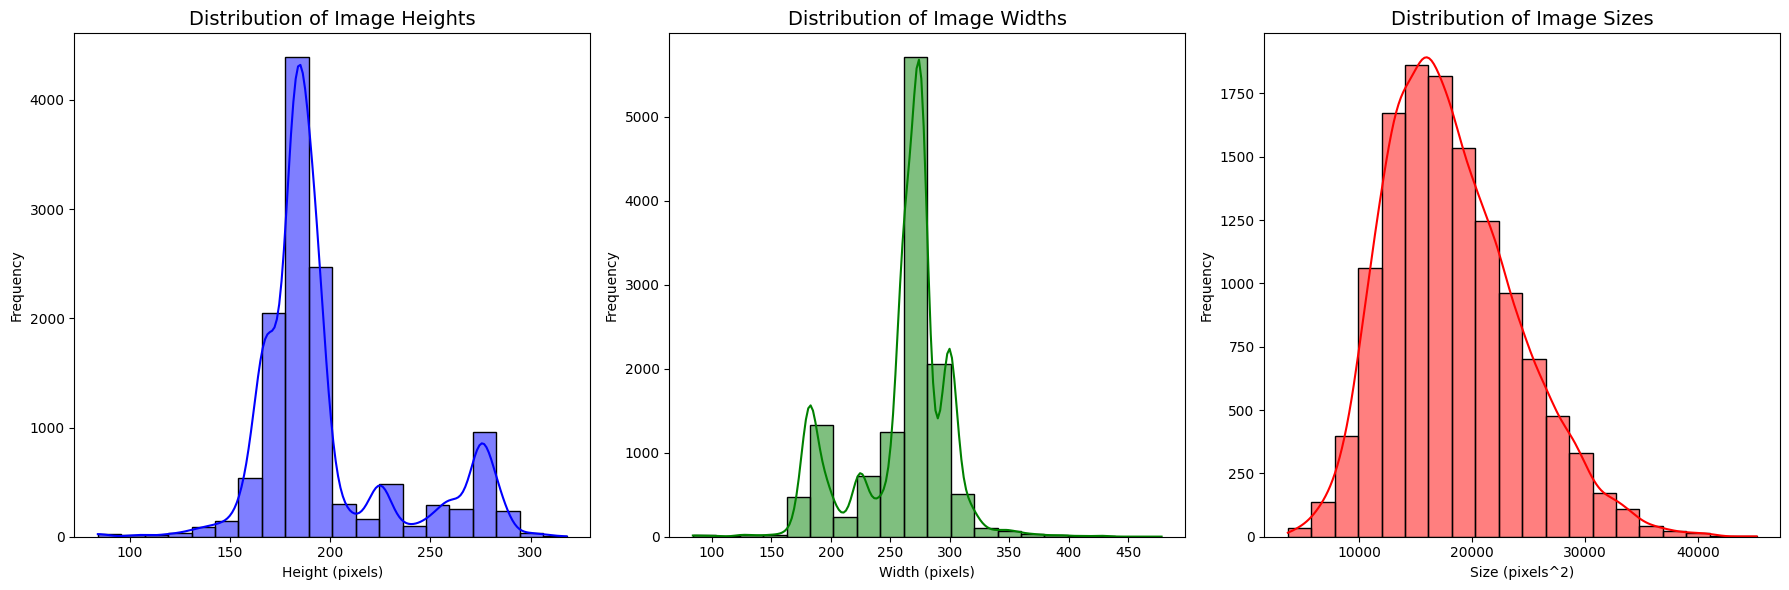

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# https://medium.com/geekculture/eda-for-image-classification-dcada9f2567a
# https://medium.com/@sehjadkhoja0/title-exploring-and-analyzing-image-data-with-python-79a7f72f4d2b
sizes = imageDetail.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
sizes.plot.scatter(x='width', y='height');
plt.title('Image Sizes')
plt.figure(figsize=(12, 6))
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(imageDetail['height'], bins=20, kde=True, color='blue')
plt.title('Distribution of Image Heights', fontsize=14)
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(imageDetail['width'], bins=20, kde=True, color='green')
plt.title('Distribution of Image Widths', fontsize=14)
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(imageDetail['size'], bins=20, kde=True, color='red')
plt.title('Distribution of Image Sizes', fontsize=14)
plt.xlabel('Size (pixels^2)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [4]:
df

filename               label
0          Image_1.jpg             sitting
1          Image_2.jpg        using_laptop
2          Image_3.jpg             hugging
3          Image_4.jpg            sleeping
4          Image_5.jpg        using_laptop
...                ...                 ...
12595  Image_12596.jpg             sitting
12596  Image_12597.jpg            clapping
12597  Image_12598.jpg             sitting
12598  Image_12599.jpg             dancing
12599  Image_12600.jpg  listening_to_music

[12600 rows x 2 columns]

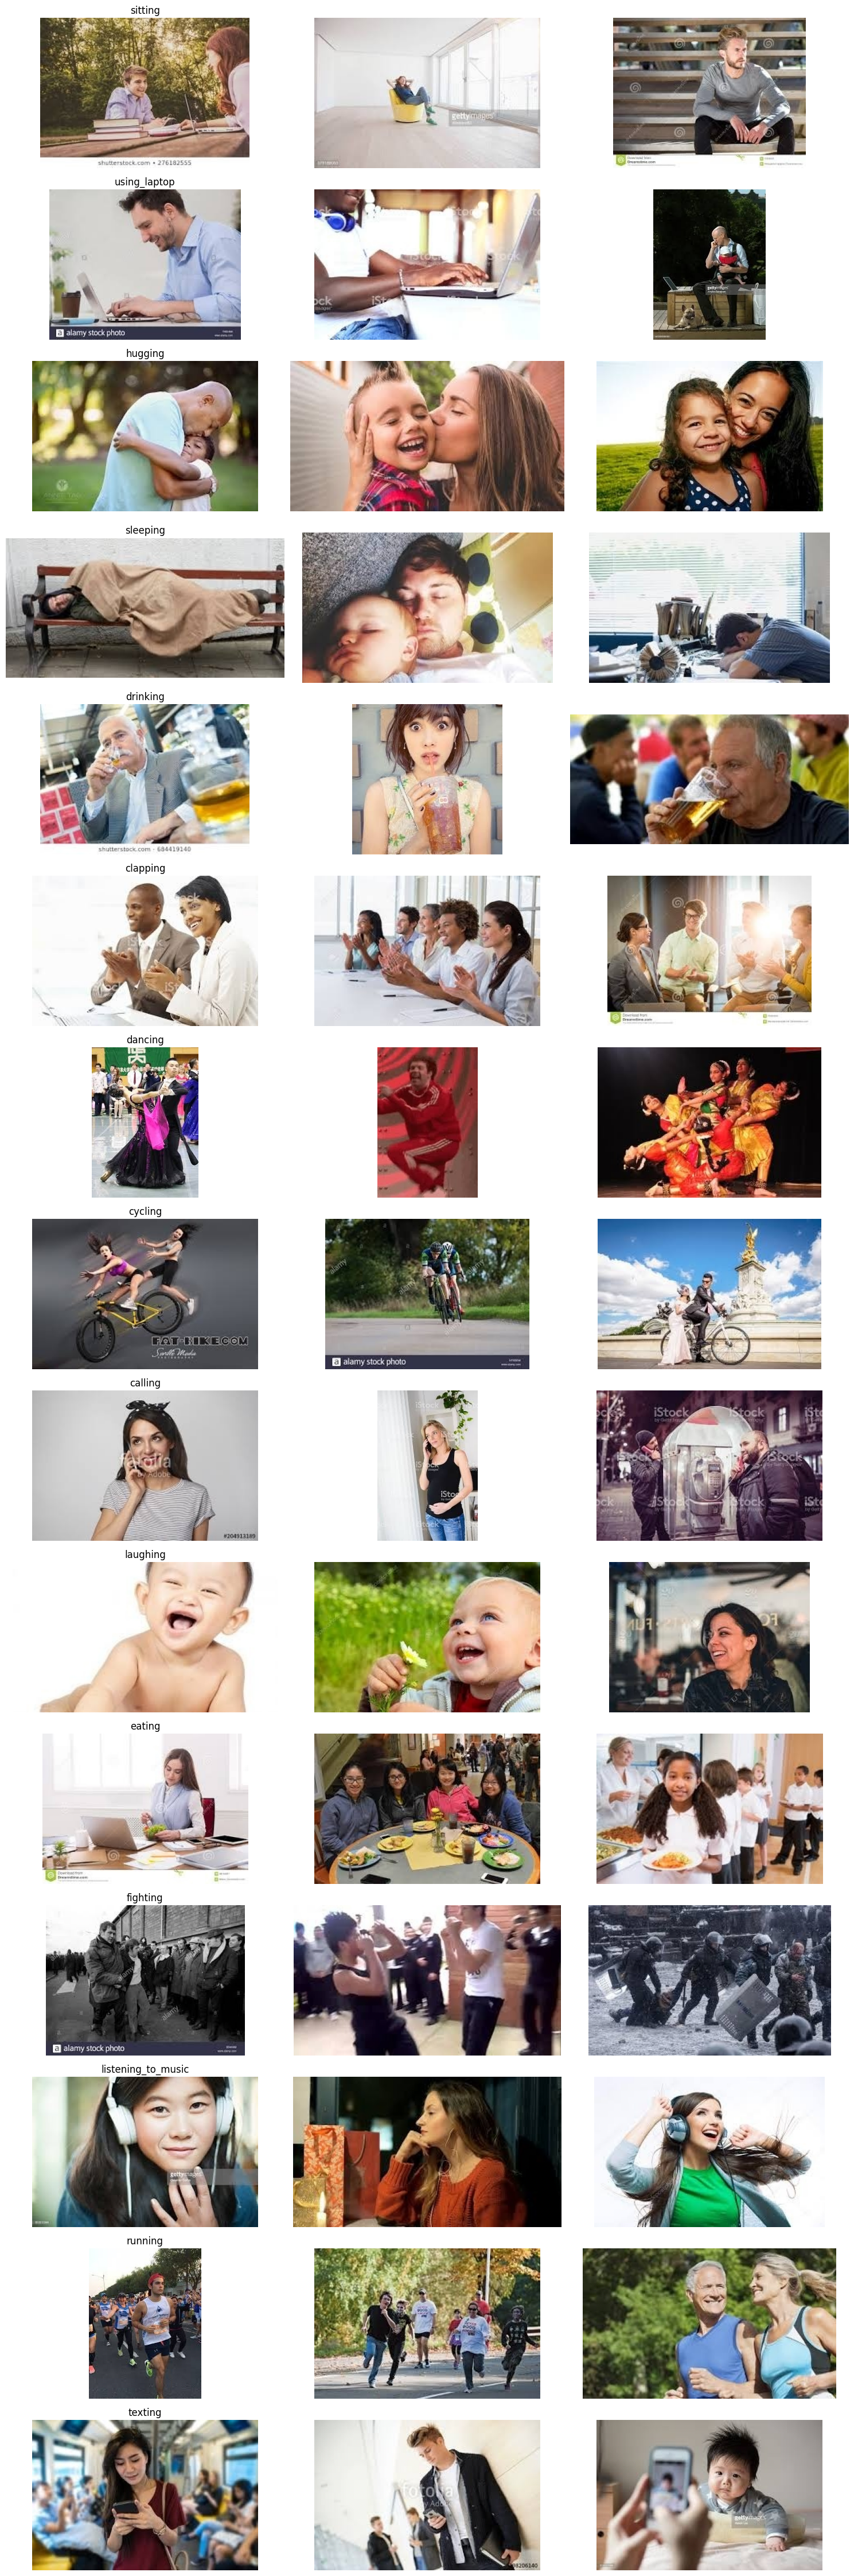

In [5]:
import matplotlib.pyplot as plt
import cv2
import os

fig, axes = plt.subplots( len(allClasses), 3, figsize=(15, 3* len(allClasses)))
for idx, label in enumerate(allClasses):
    label_images = df[df['label'] == label]
    sample_images = label_images.sample(3)
    for j, (_, rows) in enumerate(sample_images.iterrows()):
        img_path = os.path.join('data', rows['filename'])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[idx][j].imshow(img)
        axes[idx][j].axis('off')
        if j == 0: 
            axes[idx][j].set_title(f'{label}')

plt.tight_layout()
plt.show()